### Geografska raspodela zaraženih korona virusom u Srbiji

Pre par dana Republika Srbija otvorila je podatke o broju zaraženih na nivou opština i gradova i obajvljuje ih dnevno na adresi: https://covid19.data.gov.rs/

Ovaj potez je odličan u cilju transparentnosti i izveštavanja (kao posledica toga, videli smo da je veliki broj medijskih kuća napravio svoj vizelni prikaz ovih informacija), međutim, ono što tim podacima nedostaje su neke referentne vrednosti. Stoga je u nastavku kontekstualizovanje broja zaraženih na datim geografskim područjima u skladu sa veličinom datih opština i gradova.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import geopandas as gpd
import cyrtranslit
import imageio

Podaci o broju zaraženih po opštinama i gradovima preuzeti su sa covid19.data.gov.rs nalaze se u folderu *corona data gov*:

In [ ]:
files_corona = os.listdir('corona data gov/')

Fajlovi sadrže zaglavlje iz kog je moguće izdvojiti datum izveštaja, nakon čega je tabela broja zaraženih po opštinama:

In [3]:
pd.read_csv('corona data gov/'+files_corona[0],nrows=1).columns

Index(['COVID19 статистике', '2020-03-06'], dtype='object')

In [4]:
pd.read_csv('corona data gov/'+files_corona[0],header=2).head()

,Ранк,Територија,Вредност
0,1,Бачка Топола,1.0
1,2,Алексинац,0.0
2,2,Аранђеловац,0.0
3,2,Ариље,0.0
4,2,Бабушница,0.0


Učitavanje svih fajlova iz foldera, u listu datumi uneti su svi datumi izveštaja dok lista tabela sadrži izveštaje o broju zaraženih po opštinama za svaki od datuma:

In [5]:
datumi = []
tabele = []
for element in files_corona:
    datumi.append(list(pd.read_csv('corona data gov/'+element,nrows=1).columns)[1])
    temp = pd.read_csv('corona data gov/'+element,header=2)
    temp = temp.drop(columns='Ранк') # izbacujemo kolonu s pozicijom na rang listi obzirom da nam je ona nepotrebna
    tabele.append(temp)

Spajanje tabele po opštinama, za početak ćemo u tabelu preuzeti samo prvu od tabela (za prvi od datuma) i preimenovati nazive kolona:

In [6]:
merge_tabela = tabele[0]
merge_tabela.columns = ['Територија',datumi[0]]
merge_tabela.head() # u 

,Територија,2020-03-06
0,Бачка Топола,1.0
1,Алексинац,0.0
2,Аранђеловац,0.0
3,Ариље,0.0
4,Бабушница,0.0


Iteriramo kroz list datuma, dodajući novu kolonu sa brojem zaraženih po opštinama:

In [7]:
for i in range(1,len(datumi)):
    merge_tabela = pd.merge(merge_tabela,tabele[i],on='Територија',how='outer')
    merge_tabela = merge_tabela.rename(columns={'Вредност':datumi[i]})
merge_tabela.head()

,Територија,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,...,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29
0,Бачка Топола,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Алексинац,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Аранђеловац,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,2.0,2.0,3.0,3.0,3.0,0.0,4.0,4.0
3,Ариље,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Бабушница,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


10 lokacija sa najviše zaraženih poslednjeg datuma dostupnog u podacima:

In [8]:
merge_tabela.sort_values(datumi[-1],ascending=False)[[datumi[-1],'Територија']][:10]

,2020-03-29,Територија
101,352.0,Град Београд
102,59.0,Град Ниш
16,50.0,Ваљево
91,49.0,Ћуприја
41,21.0,Крагујевац
44,20.0,Крушевац
23,16.0,Врање
141,15.0,Суботица
95,12.0,Чачак
42,10.0,Краљево


Kako ljudi bolje čitaju informacije vizuelno, u nastavku je bar plot sa istim informacijama:

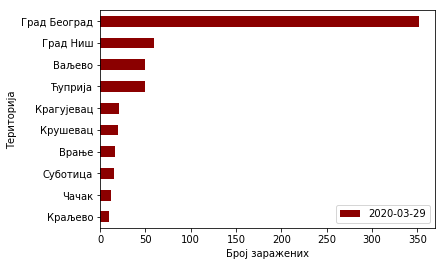

In [9]:
merge_tabela.sort_values(datumi[-1],ascending=False)[[datumi[-1],'Територија']].set_index('Територија')[:10][::-1].plot(kind='barh',color='darkred')
plt.xlabel('Број заражених')
plt.show()

A niže je i plot ukupnog broja zaraženih iz dana u dan u Srbiji:

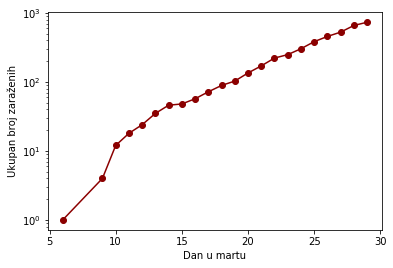

In [10]:
dani = []
for d in datumi:
    dani.append(int(d[8:]))
    
ukupno_zarazenih = list(merge_tabela.set_index('Територија').sum())
plt.plot(dani, ukupno_zarazenih,'-o',color='darkred')
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Ukupan broj zaraženih')
plt.xlabel('Dan u martu')

plt.show()

Na žalost podaci o broju zaraženih i dalje prate eksponencijalni rast, što možemo demonstrirati fitovanjem podataka u nastavku:

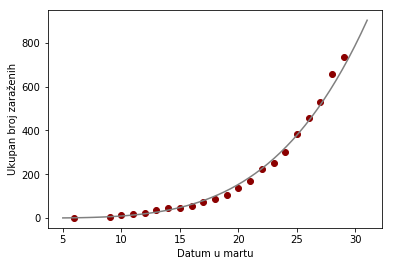

In [11]:
k,n = np.polyfit(np.log(dani),np.log(ukupno_zarazenih),1)
plt.plot(dani, ukupno_zarazenih,'o',color='darkred')

x = np.linspace(5,31,50)
plt.plot(x, np.exp(k*np.log(x)+n),color='grey')
plt.xlabel('Datum u martu')
plt.ylabel('Ukupan broj zaraženih')
plt.show()

#### Podaci po opštinama

Za crtanje grafika po opštinama kroz vreme, zgodno nam je da ovu tabelu transponujemo:

In [12]:
opstine_podaci = merge_tabela.set_index('Територија').transpose()
opstine_podaci.head()

Територија,Бачка Топола,Алексинац,Аранђеловац,Ариље,Бабушница,Бајина Башта,Баточина,Бела Паланка,Блаце,Богатић,...,Приштина,Србица,Сува Река,Косовска Митровица,Урошевац,Штимље,Штрпце,Гора,Александровац,Звечан
2020-03-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Unošenje kolone tipa datuma i kolone sa danom

In [13]:
opstine_podaci['datum'] = opstine_podaci.index
opstine_podaci['datum'] = pd.to_datetime(opstine_podaci['datum'])
opstine_podaci['dan'] = opstine_podaci['datum'].dt.day
opstine_podaci.head(2)

Територија,Бачка Топола,Алексинац,Аранђеловац,Ариље,Бабушница,Бајина Башта,Баточина,Бела Паланка,Блаце,Богатић,...,Сува Река,Косовска Митровица,Урошевац,Штимље,Штрпце,Гора,Александровац,Звечан,datum,dan
2020-03-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-06,6
2020-03-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-03-09,9


Promene iz dana u dan za 5 opština sa najviše zaraženih:

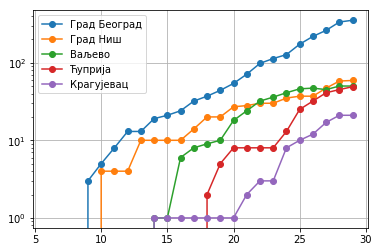

In [14]:
teritorije = list(merge_tabela.sort_values(datumi[-1],ascending=False)['Територија'][:5])
for teritorija in teritorije:
    plt.plot(opstine_podaci.dan,opstine_podaci[teritorija],'o-',label=teritorija)
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

#### Broj zaraženih na 10 000 stanovnika

Međutim, informacija sa ukupnim brojem zaraženih stanovnika neke opštine nam ne daje potpunu informaciju, pošto nije jasno da li je veliki broj zaraženih u Beogradu samo posledica velikog broja stanovnika na teritoriji te geografske celine, ili je zaista broj zaraženih veliki. Stoga ćemo podatke spojiti sa informacijama Republičkog zavoda za statistiku. Fajl 'stanovnistvo po opstinama.xlsx' sadrži procenjen broj stanovnika na datum 30.06.2018. po opštinama:

In [15]:
stanovnistvo = pd.read_excel('data/stanovnistvo po opstinama.xlsx')
stanovnistvo.head(2)

,Okrug,Територија,Становништво 30.06.2018.,Становништво 30.06.2018. по 1 km2,Површина км2
0,Град Београд,Град Београд,1690193.0,523.0,3234.0
1,Западнобачки управни округ,Сомбор,79437.0,65.0,1216.0


Spojićemo ovu tabelu sa prethodnom po koloni koja sadrži nazive teritorija:

In [16]:
opstine_stanovnistvo_covid = pd.merge(stanovnistvo,merge_tabela, on='Територија',how='outer')
opstine_stanovnistvo_covid.head(2)

,Okrug,Територија,Становништво 30.06.2018.,Становништво 30.06.2018. по 1 km2,Површина км2,2020-03-06,2020-03-09,2020-03-10,2020-03-11,2020-03-12,...,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29
0,Град Београд,Град Београд,1690193.0,523.0,3234.0,0.0,3.0,5.0,8.0,13.0,...,54.0,71.0,98.0,113.0,127.0,173.0,218.0,261.0,334.0,352.0
1,Западнобачки управни округ,Сомбор,79437.0,65.0,1216.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


A zatim za poslednji od datuma možemo uvesti i kolonu koja sadrži normirane podatke, tj. na primer broj zaraženih na 10 000 stanovnika:

In [17]:
opstine_stanovnistvo_covid[datumi[-1]+'-нормирано'] = 10000*opstine_stanovnistvo_covid[datumi[-1]]/opstine_stanovnistvo_covid['Становништво 30.06.2018.']

In [18]:
opstine_stanovnistvo_covid.sort_values(by=datumi[-1]+'-нормирано',ascending=False)[['Територија',datumi[-1]+'-нормирано']][:10]

,Територија,2020-03-29-нормирано
81,Ћуприја,17.374038
58,Ваљево,5.816524
143,Сурдулица,4.808720
123,Град Ниш,2.301263
137,Врање,2.236167
0,Град Београд,2.082602
3,Кула,2.019743
132,Бела Паланка,1.836716
82,Крушевац,1.648900
6,Алибунар,1.618472


Ovde vidimo da se 'rang lista' značajno razlikuje od one koja je najčešće komunicirana u medijima, grad Beograd nalazi se na 6. umesto na prvom mestu i daleko je manje ugrožen od Ćuprije. Kako bismo to još jasnije videli, nacrtaćemo i ove podatke, a zatim uporediti dva grafika:

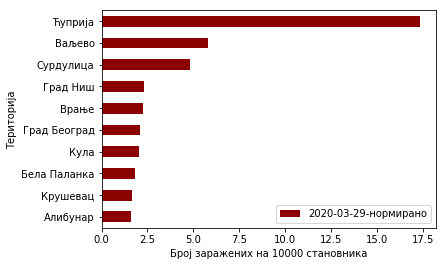

In [19]:
forplot = opstine_stanovnistvo_covid.sort_values(by=datumi[-1]+'-нормирано',ascending=False)[['Територија',datumi[-1]+'-нормирано']][:10]
forplot[::-1].set_index('Територија').plot(kind='barh',color='darkred')
plt.xlabel('Број заражених на 10000 становника')
plt.show()

In [20]:
najvisezarazenih10 = list(merge_tabela.sort_values(datumi[-1],ascending=False)['Територија'][:10])

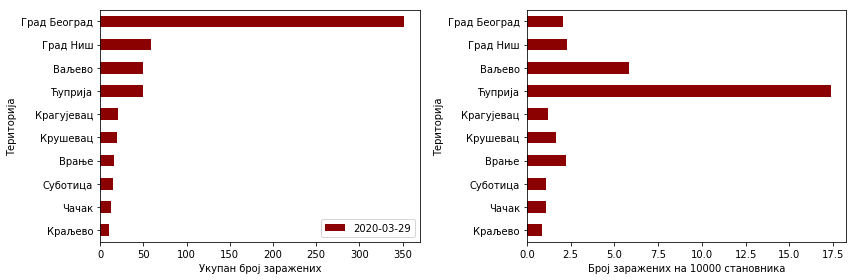

In [21]:
fig, axs = plt.subplots(1,2, figsize=(12, 4))

merge_tabela.sort_values(datumi[-1],ascending=False)[[datumi[-1],'Територија']].set_index('Територија')[:10][::-1].plot(ax=axs[0],kind='barh',color='darkred')
axs[0].set_xlabel('Укупан број заражених')

forplot2 = opstine_stanovnistvo_covid[opstine_stanovnistvo_covid['Територија'].isin(najvisezarazenih10)].set_index('Територија')[datumi[-1]+'-нормирано']
forplot2[najvisezarazenih10][::-1].plot(ax=axs[1],kind='barh',color='darkred')
axs[1].set_xlabel('Број заражених на 10000 становника')
plt.tight_layout()
plt.savefig('Top10_zarazenih_2903.png',format='png',dpi=300)
plt.show()

#### Prikaz podataka na mapi

Iako vizualizacija na mapi nije baš optimalan način za komunikaciju informacija (ljudi su daleko lošiji u poređenju brightnes-a, veličine kružića nego dužina), evo u nastavku i prikaza na mapi:

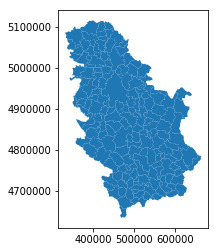

In [22]:
# geografski podaci za opstine preuzeti su sa: https://opendata.geosrbija.rs/ korigovanih imena i mergovanih gradova (Beograd, Nis) za lakse spajanje s podacima u nastavku
opstine_geo = gpd.read_file('data/geo_podaci_opstine.xlsx',encoding='UTF-8')
opstine_geo.plot()
plt.show()

In [23]:
opstine_geo.head(2)

,opstina_im,okrug_imel,wkt,geometry
0,BAČKA TOPOLA,SEVERNOBAÄŒKI UPRAVNI OKRUG,"POLYGON((378765.834100001 5089008.2704,379027....","POLYGON ((378765.834 5089008.270, 379027.486 5..."
1,SVILAJNAC,POMORAVSKI UPRAVNI OKRUG,"POLYGON((512774.023400001 4907035.736,512766.4...","POLYGON ((512774.023 4907035.736, 512766.490 4..."


U prethodno korišćenoj tabeli opstine_stanovnistvo_covid, nazivi teritorija su ćirilični, pa ćemo dodati u tu tabelu kolonu naziva *opstina_im* u kojoj su nazivi opština latinični i capital:

In [24]:
opstine_stanovnistvo_covid['opstina_im'] = [cyrtranslit.to_latin(text,'sr').upper() for text in list(opstine_stanovnistvo_covid['Територија'])]

Mergovana tabela sada sadrži pored geografskih podataka i broj zaraženih stanovnika iz dana u dan, kao i broj stanovnika u datoj opštini:

In [25]:
opstine_stanovnistvo_covid_geo = pd.merge(opstine_geo,opstine_stanovnistvo_covid,on='opstina_im',how='outer')
opstine_stanovnistvo_covid_geo.head(2)

,opstina_im,okrug_imel,wkt,geometry,Okrug,Територија,Становништво 30.06.2018.,Становништво 30.06.2018. по 1 km2,Површина км2,2020-03-06,...,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-29-нормирано
0,BAČKA TOPOLA,SEVERNOBAÄŒKI UPRAVNI OKRUG,"POLYGON((378765.834100001 5089008.2704,379027....","POLYGON ((378765.834 5089008.270, 379027.486 5...",Севернобачки управни округ,Бачка Топола,30927.0,52.0,596.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.323342
1,SVILAJNAC,POMORAVSKI UPRAVNI OKRUG,"POLYGON((512774.023400001 4907035.736,512766.4...","POLYGON ((512774.023 4907035.736, 512766.490 4...",Поморавски управни округ,Свилајнац,21414.0,66.0,326.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000


Plot kolone sa normiranim podacima o broju zaraženih 20202-03-29:

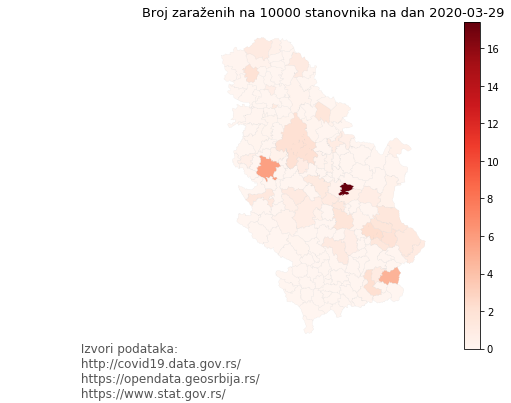

In [26]:
fig, ax = plt.subplots(1,figsize=(10,6))
opstine_stanovnistvo_covid_geo['2020-03-29-нормирано'] = opstine_stanovnistvo_covid_geo['2020-03-29-нормирано'].fillna(0)
opstine_stanovnistvo_covid_geo.plot(column='2020-03-29-нормирано', ax=ax, legend=True, cmap='Reds', linewidth=0.1, edgecolor='0.8')
ax.axis('off')
ax.set_title('Broj zaraženih na 10000 stanovnika na dan '+datumi[-1], fontdict={'fontsize': '13', 'fontweight': '3'})
ax.annotate(' Izvori podataka: \n http://covid19.data.gov.rs/\n https://opendata.geosrbija.rs/\n https://www.stat.gov.rs/',xy=(0.15, 0.15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555');

Crtanje i čuvanje mapa za svaki od datuma za koje postoje podaci i pravljenje animacije:

In [28]:
for i in range(len(datumi)):
    opstine_stanovnistvo_covid_geo['Broj zarazenih na 10k'] = 10000*opstine_stanovnistvo_covid_geo[datumi[i]]/opstine_stanovnistvo_covid_geo['Становништво 30.06.2018.']
    opstine_stanovnistvo_covid_geo['Broj zarazenih na 10k'] = opstine_stanovnistvo_covid_geo['Broj zarazenih na 10k'].fillna(0) # popunjavanje 0 za lokacije sa nepotpunim podacima
    
    fig, ax = plt.subplots(1,figsize=(10,6))
    opstine_stanovnistvo_covid_geo.plot(column='Broj zarazenih na 10k', ax=ax, legend=True, cmap='Reds', linewidth=0.1, edgecolor='0.8')
    ax.axis('off')
    ax.set_title('Ukupno zaraženih na 10000 stanovnika iz dana u dan\n\n'.upper(), fontdict={'fontsize': '12'})
    ax.annotate(' Izvori podataka: \n http://covid19.data.gov.rs/\n https://opendata.geosrbija.rs/\n https://www.stat.gov.rs/',xy=(0.15, 0.15),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555');
    ax.annotate('Datum: ' + datumi[i] + '\nUkupno zaraženih: '+str(int(ukupno_zarazenih[i])),xy=(0.15, 0.5),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, fontweight=5, color='#555555');

    plt.savefig('plots/Zarazeni na 10k stanovnika '+datumi[i]+'.png',format='png',dpi=300)
    plt.close(fig)

In [29]:
images = []
for datum in datumi:
    images.append(imageio.imread('plots/Zarazeni na 10k stanovnika '+datum+'.png'))
imageio.mimsave('covid19_rs.gif', images, duration = 0.5)

Dobijeni gif:

<img src="covid19_rs.gif" width="750" align="left">